In [2]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import backtrader as bt

In [ ]:
print(f'akshare{ak.__version__}')
print(f'backtrader{bt.__version__}')


In [2]:
df = ak.stock_zh_a_hist(
        symbol='603176',
        period="daily",
        adjust="qfq"
    )
df.head()

,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2021-12-31,603176,1.94,2.35,2.35,1.94,17132,4182026.0,25.63,46.88,0.75,1.47
1,2022-01-04,603176,2.60,2.60,2.60,2.60,3465,935569.0,0.00,10.64,0.25,0.30
2,2022-01-05,603176,2.87,2.87,2.87,2.87,2442,725366.0,0.00,10.38,0.27,0.21
3,2022-01-06,603176,3.17,3.17,3.17,3.17,2909,951200.0,0.00,10.45,0.30,0.25
4,2022-01-07,603176,3.50,3.50,3.50,3.50,3741,1346634.0,0.00,10.41,0.33,0.32


In [ ]:
df.to_csv()

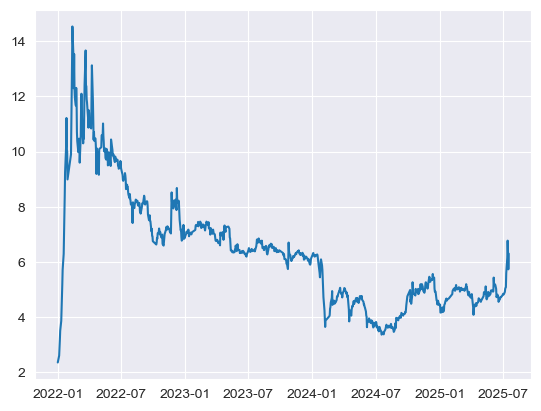

In [7]:
plt.plot(df['日期'], df['收盘'])
plt.show()

In [5]:
# 做差
delta = df['收盘'].diff()
delta

0       NaN
1      0.25
2      0.27
3      0.30
4      0.33
       ... 
853    0.56
854    0.62
855   -0.40
856   -0.64
857    0.57
Name: 收盘, Length: 858, dtype: float64

In [ ]:
up = delta.where(delta > 0)
down = -delta.where(delta < 0)
# 计算14天的平均涨跌幅
up_ewm = up.ewm(com=13, adjust=False).mean()
down_ewm = down.ewm(com=13, adjust=False).mean()
rs = up_ewm / down_ewm
rsi = 100 - 100 / (1 + rs)
